In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

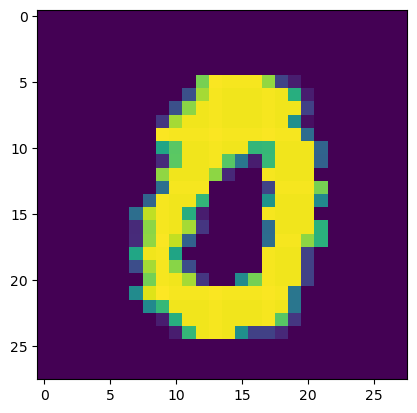

In [15]:
plt.imshow(x_train[69])

In [16]:
x_train = x_train/255
x_test = x_test/255

In [18]:
#ANN

In [56]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))  #Convert into 1D layer, 28x28 i/p into 1x784
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax')) #if more than 1 node in o/p use softmax activation.

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [59]:
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 2s 990us/step - loss: 0.2803 - accuracy: 0.9199 - val_loss: 0.1491 - val_accuracy: 0.9581
Epoch 2/25
1500/1500 [==============================] - 1s 947us/step - loss: 0.1233 - accuracy: 0.9636 - val_loss: 0.1177 - val_accuracy: 0.9624
Epoch 3/25
1500/1500 [==============================] - 1s 935us/step - loss: 0.0865 - accuracy: 0.9738 - val_loss: 0.0926 - val_accuracy: 0.9719
Epoch 4/25
1500/1500 [==============================] - 1s 996us/step - loss: 0.0637 - accuracy: 0.9798 - val_loss: 0.1108 - val_accuracy: 0.9678
Epoch 5/25
1500/1500 [==============================] - 1s 928us/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0940 - val_accuracy: 0.9725
Epoch 6/25
1500/1500 [==============================] - 1s 928us/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0970 - val_accuracy: 0.9737
Epoch 7/25
1500/1500 [==============================] - 1s 937us/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.1014 -

In [60]:
y_prob = model.predict(x_test)

313/313 [==============================] - 0s 450us/step


In [61]:
y_prob

array([[3.7151473e-18, 1.6415177e-14, 9.7049107e-16, ..., 1.0000000e+00,
        2.5298032e-17, 1.7866790e-11],
       [6.8960096e-14, 3.1671042e-13, 9.9999988e-01, ..., 6.6332207e-21,
        1.7052288e-07, 4.6208480e-23],
       [1.0493813e-11, 1.0000000e+00, 3.6464975e-09, ..., 4.4062851e-08,
        1.7904856e-08, 6.6811875e-15],
       ...,
       [5.2080548e-32, 6.0507646e-18, 8.7626770e-23, ..., 9.9224436e-16,
        5.4138722e-23, 1.7075774e-16],
       [6.2375932e-20, 6.7373133e-23, 8.5202907e-26, ..., 8.9314453e-24,
        3.8765897e-11, 1.0337839e-23],
       [5.3650759e-19, 3.3310374e-14, 1.8066061e-22, ..., 1.2491639e-20,
        5.4533511e-18, 3.1014791e-20]], dtype=float32)

In [62]:
y_pred = y_prob.argmax(axis=1)

In [63]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9788

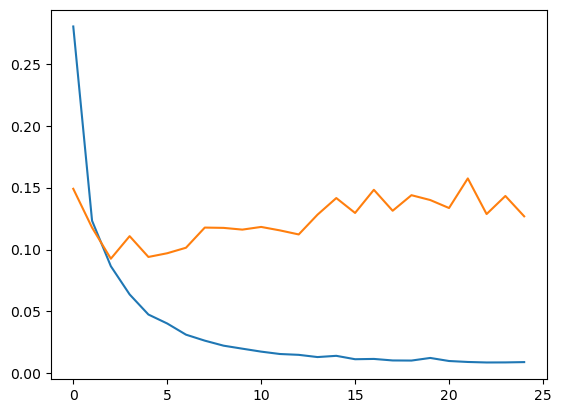

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

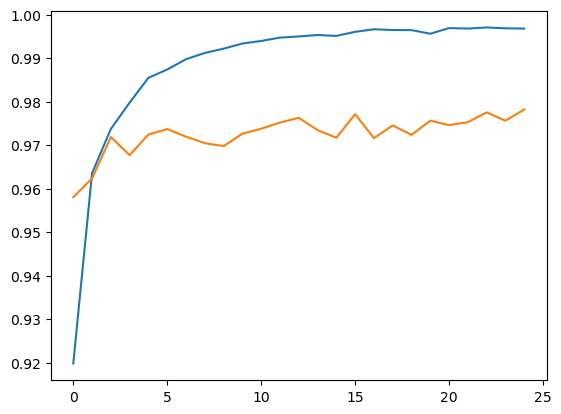

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

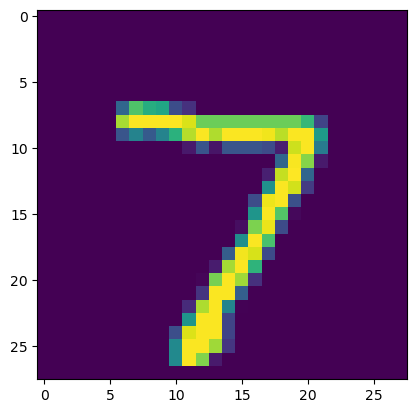

In [69]:
plt.imshow(x_test[0])

In [72]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 12ms/step


array([7])

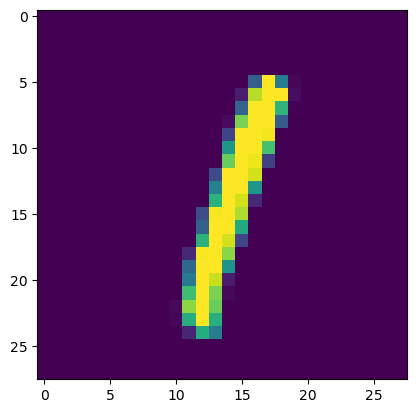

In [73]:
plt.imshow(x_test[5])

In [74]:
model.predict(x_test[5].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 16ms/step


array([1])

In [68]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_user_image(model, img_path):
    # Load the image from the given path
    img = image.load_img(img_path, color_mode='grayscale')
    
    # Resize the image to match the input shape of the model (28x28)
    img = img.resize((28, 28))
    
    # Convert the image to a numpy array and normalize the pixel values
    img_array = image.img_to_array(img) / 255.0
    
    # Reshape the image array to match the input shape of the model
    img_array = img_array.reshape((1, 28, 28))
    
    # Make a prediction using the model
    y_prob = model.predict(img_array)
    
    # Convert probabilities to class label
    y_pred = np.argmax(y_prob)
    
    # Return the predicted label
    return y_pred

# Specify the path to the image you want to predict
img_path = '/Users/dipeshkumar/Desktop/Screenshot 2024-04-23 at 11.39.23 PM.png'

# Call the function with the trained model and the image path
predicted_label = predict_user_image(model, img_path)

print(f'Predicted label: {predicted_label}')


1/1 [==============================] - 0s 13ms/step
Predicted label: 5
